In [1]:
#RUn it to download stopword
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA
import nltk, string

In [4]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
#Đọc data
train = pd.read_csv('./train.csv')

# xóa các từ stopwords.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
x_list = []
y_list = []
x_list = [w.lower() for w in train['description_x'] if w not in stop_words]
y_list = [w.lower() for w in train['description_y'] if w not in stop_words]

In [5]:
train.head()

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,4,visa inc class a,visa inc.,V,V,True


In [6]:
print("Train set", x_list[0:10],"\n")
print("Test set",y_list[0:10])

Train set ['first trust dow jones internet', 'schwab intl large company index etf', 'vanguard small cap index adm', 'duke energy corp new com new isin #us4 sedol #b7jzsk0', 'visa inc class a', 'ford motor co new div: 0.600', 'united states steel corp', 'vanguard total international bond index etf', 'schwab strategic tr us sml c', 'mfs value fd cl i'] 

Test set ['first trust dj internet idx', 'schwab strategic tr fundamental intl large co index etf', 'vanguard small-cap index fund inst', 'duke energy corp new com new isin #us26441c2044 sedol #b7jzs', 'visa inc.', 'ford motor co', 'united sts stl cp (new)', 'vanguard total intl bond index etf', 'schwab us small cap etf', 'mfs value fund cl i']


# Text similarity với one-hot và độ đo cosine

In [7]:
def dot(A,B): 
    return (sum(a*b for a,b in zip(A,B)))
def cosine_similarity_original(a,b):
    return dot(a,b) / ( (dot(a,a) **.5) * (dot(b,b) ** .5) )
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [8]:
#Gọi hàm stop word
vectorizer = CountVectorizer(stop_words='english')

#Khử stop word
x_list_onehot = vectorizer.fit_transform(x_list).toarray()
y_list_onehot = vectorizer.transform(y_list).toarray()

print ("-----Text similarity với One hot vector và độ do cosine: -----")
for i in range(5):
    print ("Sentence x(",i,"):",x_list[i],"->",x_list_onehot[i])
    print ("Sentence y(",i,"):",y_list[i],"->",y_list_onehot[i])
    print ("=> cosine similarity %.3f" % cosine_similarity_original(x_list_onehot[i],y_list_onehot[i]),"\n")  

-----Text similarity với One hot vector và độ do cosine: -----
Sentence x( 0 ): first trust dow jones internet -> [0 0 0 ... 0 0 0]
Sentence y( 0 ): first trust dj internet idx -> [0 0 0 ... 0 0 0]
=> cosine similarity 0.577 

Sentence x( 1 ): schwab intl large company index etf -> [0 0 0 ... 0 0 0]
Sentence y( 1 ): schwab strategic tr fundamental intl large co index etf -> [0 0 0 ... 0 0 0]
=> cosine similarity 0.722 

Sentence x( 2 ): vanguard small cap index adm -> [0 0 0 ... 0 0 0]
Sentence y( 2 ): vanguard small-cap index fund inst -> [0 0 0 ... 0 0 0]
=> cosine similarity 0.730 

Sentence x( 3 ): duke energy corp new com new isin #us4 sedol #b7jzsk0 -> [0 0 0 ... 0 0 0]
Sentence y( 3 ): duke energy corp new com new isin #us26441c2044 sedol #b7jzs -> [0 0 0 ... 0 0 0]
=> cosine similarity 0.913 

Sentence x( 4 ): visa inc class a -> [0 0 0 ... 0 0 0]
Sentence y( 4 ): visa inc. -> [0 0 0 ... 0 0 0]
=> cosine similarity 0.707 



# Text similarity với TF-IDF và độ do cosine

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Xóa Ký tự đặc biệt
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))
#Áp dụng tf-idf và xóa stop word
vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_similarity_TFIDF(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [10]:
for i in range(5):
    print ("Sentence x(",i,"):",x_list[i])
    print ("Sentence y(",i,"):",y_list[i])
    print ("=> cosine similarity %.3f" %cosine_similarity_TFIDF(x_list[i],y_list[i]),"\n")   

Sentence x( 0 ): first trust dow jones internet
Sentence y( 0 ): first trust dj internet idx
=> cosine similarity 0.336 

Sentence x( 1 ): schwab intl large company index etf
Sentence y( 1 ): schwab strategic tr fundamental intl large co index etf
=> cosine similarity 0.573 

Sentence x( 2 ): vanguard small cap index adm
Sentence y( 2 ): vanguard small-cap index fund inst
=> cosine similarity 0.252 

Sentence x( 3 ): duke energy corp new com new isin #us4 sedol #b7jzsk0
Sentence y( 3 ): duke energy corp new com new isin #us26441c2044 sedol #b7jzs
=> cosine similarity 0.717 

Sentence x( 4 ): visa inc class a
Sentence y( 4 ): visa inc.
=> cosine similarity 0.580 



# Word similarity và Text Similarity với Word2vec

In [12]:
!pip install gensim

In [16]:
# Import required libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
 
# Import Data
df=pd.read_csv('./questions.csv')
 
# Check for null values
df[df.isnull().any(axis=1)]
 
# Drop rows with null Values
df.drop(df[df.isnull().any(axis=1)].index,inplace=True)

In [17]:
df[1000:1005]

,id,qid1,qid2,question1,question2,is_duplicate
1000,1000,2001,2002,How can I convert raw files to JPEG in photos ...,How do you convert raw files to JPEG?,0
1001,1001,2003,2004,What is the best age to teach a child how to s...,When is a good time to teach your children how...,1
1002,1002,2005,2006,"Which is less healthy for your body, beer or P...",Which is less healthy for your body light beer...,1
1003,1003,2007,2008,Where can I find my mentor?,Where can I find a willing mentor?,0
1004,1004,2009,2010,What would cause an AMP to cut out?,What would cause an AMP to cut out? How do you...,1


Clean texts và remove stopwords.

In [18]:
def review_to_wordlist(review):  
    # Convert words to lower case and split them
    words = review.lower().split()

    stops = set(stopwords.words("english"))
    words = [w for w in words if not w in stops]
    
    review_text = " ".join(words)

    # Clean the text
    review_text = re.sub(r"[^A-Za-z0-9(),!.?\'\`]", " ", review_text)
    review_text = re.sub(r"\'s", " 's ", review_text)
    review_text = re.sub(r"\'ve", " 've ", review_text)
    review_text = re.sub(r"n\'t", " 't ", review_text)
    review_text = re.sub(r"\'re", " 're ", review_text)
    review_text = re.sub(r"\'d", " 'd ", review_text)
    review_text = re.sub(r"\'ll", " 'll ", review_text)
    review_text = re.sub(r",", " ", review_text)
    review_text = re.sub(r"\.", " ", review_text)
    review_text = re.sub(r"!", " ", review_text)
    review_text = re.sub(r"\(", " ( ", review_text)
    review_text = re.sub(r"\)", " ) ", review_text)
    review_text = re.sub(r"\?", " ", review_text)
    review_text = re.sub(r"\s{2,}", " ", review_text)
    
    words = review_text.split()
    

    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in words]
    
    review_text = " ".join(stemmed_words)
    
    return(review_text)

In [19]:
def process_questions(question_list, questions, question_list_name):
# function to transform questions and display progress
    for question in questions:
        question_list.append(review_to_wordlist(question))

In [20]:
questions1 = []     
process_questions(questions1, df.question1, "questions1")
print()
questions2 = []     
process_questions(questions2, df.question2, "questions2")

In [21]:
print(questions1[:5])
print(questions2[:5])

['step step guid invest share market india', 'stori kohinoor ( koh i noor ) diamond', 'increas speed internet connect use vpn', 'mental lone solv it', 'one dissolv water quik sugar salt methan carbon di oxid']
['step step guid invest share market', 'would happen indian govern stole kohinoor ( koh i noor ) diamond back', 'internet speed increas hack dns', 'find remaind math 23 24 math divid 24 23', 'fish would surviv salt water']


In [22]:
# Lưu các chỉ mục câu không xác định
invalid_questions = []

for i in range(len(questions1)):
    # Câu hỏi cần chứa nguyên âm
    if not re.search('[aeiouyAEIOUY]', questions1[i]) or not re.search('[aeiouyAEIOUY]', questions2[i]):
    # Điều chính số câu sau khi xóa các chỉ mục sai
        invalid_questions.append(i-len(invalid_questions))
        
print("Số lượng câu invalid",len(invalid_questions))

Số lượng câu invalid 353


In [23]:
for index in invalid_questions:
    df = df[df.id != index]
    questions1.pop(index)
    questions2.pop(index)
    
unexpected_invalid_questions = [36460,42273,65937,304867,306828,353918]

for index in unexpected_invalid_questions:
    df = df[df.id != index]
    questions1.pop(index)
    questions2.pop(index)

In [31]:
# Contains the processed questions for Doc2Vec
questions_labeled = []

for i in range(len(questions1)):
    # Question strings need to be separated into words
    # Each question needs a unique label
    questions_labeled.append(TaggedDocument(words=questions1[i].split(), tags=df[df.index == i].qid1))
    questions_labeled.append(TaggedDocument(words=questions2[i].split(), tags=df[df.index == i].qid2))
    if i % 40000 == 0:
        progress = i/len(questions1) * 100
        print("{}% complete".format(round(progress, 2)))

0.0% complete
9.9% complete
19.8% complete
29.7% complete
39.61% complete
49.51% complete
59.41% complete
69.31% complete
79.21% complete
89.11% complete
99.01% complete


In [32]:
# Split questions for computing similarity and determining the lengths of the questions.
questions1_split = []
for question in questions1:
    questions1_split.append(question.split())
    
questions2_split = []
for question in questions2:
    questions2_split.append(question.split())

In [33]:
# Determine the length of questions to select more optimal parameters.
lengths = []
for i in range(len(questions1_split)):
    lengths.append(len(questions1_split[i]))
    lengths.append(len(questions2_split[i]))
lengths = pd.DataFrame(lengths, columns=["count"])

In [36]:
# Build the model
model = Doc2Vec(dm = 1, min_count=1, window=10, vector_size=150, sample=1e-4, negative=10)
model.build_vocab(questions_labeled)

In [37]:
model.train(questions_labeled,total_examples=model.corpus_count,epochs=5)

# Text similarity with Doc2Vec

In [46]:
doc2vec_scores = []
for i in range(len(questions1_split)):
    # n_similarity computes the cosine similarity in Doc2Vec
    score = model.docvecs.n_similarity(questions1_split[i],questions2_split[i])
    doc2vec_scores.append(score)

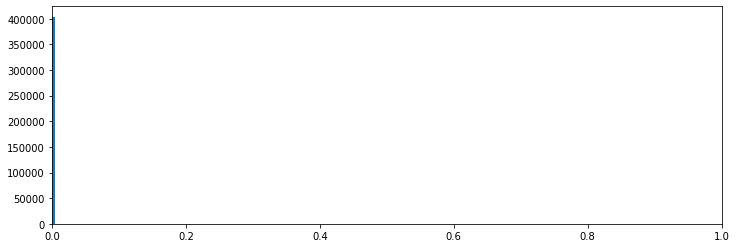

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.hist(doc2vec_scores, bins = 200)
plt.xlim(0,1)
plt.show()

In [48]:
from sklearn.metrics import accuracy_score
scores = []
for score in doc2vec_scores:
        if score >= 0.9:
            scores.append(1)
        else:
            scores.append(0)
            
accuracy = accuracy_score(df.is_duplicate, scores) * 100
print("Accuracy score is {}%.".format(round(accuracy),1))

Accuracy score is 63%.
